**Dataset Description**
File descriptions

train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
Data fields

Here's a brief version of what we will find in the data description file.

**SalePrice**: Final sale price of the property in dollars (target variable).

**MSSubClass**: Category of building type.

**MSZoning**: Zoning classification of the property.

**LotFrontage**: Length of street connected to the property in feet.

**LotArea**: Lot size in square feet.

**Street**: Type of street access (paved or gravel).

**Alley**: Type of alley access (if available).

**LotShape**: General shape of the property lot.

**LandContour**: Property flatness or contour.

**Utilities**: Types of public utilities available.

**LotConfig**: Property configuration concerning surrounding properties.

**LandSlope**: Slope of the property.

**Neighborhood**: Physical location within Ames city limits.

**Condition1**: Proximity to main road or railroad.

**Condition2**: Proximity to a second road or railroad (if applicable).

**BldgType**: Type of dwelling or building.

**HouseStyle**: Architectural style of the house.

**OverallQual**: Overall quality of materials and finish of the house.

**OverallCond**: Overall condition of the house.

**YearBuilt**: Original construction year of the house.

**YearRemodAdd**: Year of the latest remodel or addition.

**RoofStyle**: Style of the roof (gable, flat, etc.).

**RoofMatl**: Roof material type.

**Exterior1st**: Exterior covering material (main).

**Exterior2nd**: Exterior covering material (secondary, if any).

**MasVnrType**: Type of masonry veneer on the exterior.

**MasVnrArea**: Masonry veneer area in square feet.

**ExterQual**: Quality of the exterior material.

**ExterCond**: Current condition of the exterior material.


**Foundation**: Type of foundation used.

**BsmtQual**: Height of the basement.

**BsmtCond**: General condition of the basement.

**BsmtExposure**: Walkout or garden-level walls for the basement.

**BsmtFinType1**: Quality of the primary finished area in the basement.

**BsmtFinSF1**: Square feet of finished area (Type 1) in the basement.

**BsmtFinType2**: Quality of the second finished area in the basement (if any).

**BsmtFinSF2**: Square feet of finished area (Type 2) in the basement.

**BsmtUnfSF**: Unfinished square feet of the basement area.


**TotalBsmtSF**: Total square feet of basement area.

**Heating**: Type of heating system in the house.

**HeatingQC**: Quality and condition of the heating system.

**CentralAir**: Whether the house has central air conditioning.

**Electrical**: Type of electrical system.

**1stFlrSF**: Square feet of the first floor.

**2ndFlrSF**: Square feet of the second floor.

**LowQualFinSF**: Square feet of low-quality finished space.

**GrLivArea**: Above-ground living area square feet.

**BsmtFullBath**: Number of full bathrooms in the basement.

**BsmtHalfBath**: Number of half bathrooms in the basement.

**FullBath**: Number of full bathrooms above ground.

**HalfBath**: Number of half bathrooms above ground.

**Bedroom**: Number of bedrooms above the basement level.

**Kitchen**: Number of kitchens in the house.

**KitchenQual**: Kitchen quality rating.

**TotRmsAbvGrd**: Total number of rooms above grade (excluding bathrooms).

**Functional**: Home functionality rating.

**Fireplaces**: Number of fireplaces.

**FireplaceQu**: Quality of the fireplace.

**GarageType**: Location of the garage.

**GarageYrBlt**: Year the garage was built.

**GarageFinish**: Interior finish of the garage.

**GarageCars**: Garage size in car capacity.

**GarageArea**: Square feet of the garage.

**GarageQual**: Garage quality.

**GarageCond**: Garage condition.

**PavedDrive**: Whether the driveway is paved.

**WoodDeckSF**: Square feet of the wood deck.

**OpenPorchSF**: Square feet of open porch space.

**EnclosedPorch**: Square feet of enclosed porch space.

**3SsnPorch**: Square feet of three-season porch space.

**ScreenPorch**: Square feet of screen porch space.

**PoolArea**: Square feet of the pool area.

**PoolQC**: Pool quality.

**Fence**: Fence quality.

**MiscFeature**: Additional features (shed, etc.).

**MiscVal**: Value of the miscellaneous features.

**MoSold**: Month the house was sold.

**YrSold**: Year the house was sold.

**SaleType**: Type of sale.

**SaleCondition**: Condition of the sale (normal, foreclosure, etc.).

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_numbers= df_train.select_dtypes(include=['float','int'])
df_numbers

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
df_object=df_train.select_dtypes(include=['object'])
df_object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
df_numbers_test = df_test.select_dtypes(include=['int','float'])
df_numbers_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [8]:
df_object_test = df_test.select_dtypes(include=['object'])
df_object_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [9]:
df_numbers_test.fillna(df_numbers_test.mean(),inplace=True)
df_numbers_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [10]:
df_object_test.fillna(df_object_test.select_dtypes(include=['object']).mode().iloc[0], inplace=True)
df_object_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1455,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


In [11]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = encoder.fit_transform(df_object_test)
encoded_df_test = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(df_object_test.columns))
print(encoded_df_test.head())

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0          0.0          1.0          0.0          0.0          1.0   
1          0.0          0.0          1.0          0.0          1.0   
2          0.0          0.0          1.0          0.0          1.0   
3          0.0          0.0          1.0          0.0          1.0   
4          0.0          0.0          1.0          0.0          1.0   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  \
0         0.0           0.0           0.0           1.0              0.0  ...   
1         0.0           0.0           0.0           0.0              0.0  ...   
2         0.0           0.0           0.0           0.0              0.0  ...   
3         0.0           0.0           0.0           0.0              0.0  ...   
4         0.0           0.0           0.0           0.0              1.0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
test_data = pd.concat([df_numbers_test, encoded_df_test], axis=1)
print(test_data.head())

     Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0       1961          1961         0.0       468.0  ...             0.0   
1       1958          1958       108.0       923.0  ...             0.0   
2       1997          1998         0.0       791.0  ...             0.0   
3       1998          1998        20.0       602.0  ...             0.0   
4       1992          1992         0.0       263.0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0  

In [13]:
null_values=df_train.isna().sum()
null_columns = null_values[null_values > 0]
null_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**Mean imputation for null or missing values same done for both testing dataset and training dataset**

In [14]:
df_numbers.fillna(df_numbers.mean(), inplace=True)
df_numbers

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


**Mode imputation for categorical varibales which means the most repeated will be placed in place of null values**

In [15]:
df_object.fillna(df_object.select_dtypes(include=['object']).mode().iloc[0], inplace=True)
df_object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


**One-Hot encoding for converting categorical varibales into numerical variables by creating binary columns**

In [16]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = encoder.fit_transform(df_object)
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(df_object.columns))
print(encoded_df.head())

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0          0.0          0.0          1.0          0.0          1.0   
1          0.0          0.0          1.0          0.0          1.0   
2          0.0          0.0          1.0          0.0          1.0   
3          0.0          0.0          1.0          0.0          1.0   
4          0.0          0.0          1.0          0.0          1.0   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  \
0         0.0           0.0           0.0           1.0              0.0  ...   
1         0.0           0.0           0.0           1.0              0.0  ...   
2         0.0           0.0           0.0           0.0              0.0  ...   
3         0.0           0.0           0.0           0.0              0.0  ...   
4         0.0           0.0           0.0           0.0              0.0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
train_data = pd.concat([df_numbers, encoded_df], axis=1)
print(train_data.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...             0.0             0.0   
1          1976         0.0         978  ...             0.0             0.0   
2          2002       162.0         486  ...             0.0             0.0   
3          1970         0.0         216  ...             0.0             0.0   
4          2000       350.0         655  ...             0.0             0.0   

   SaleType_New  SaleType_Oth  SaleTyp

**There is a high variation in the values of SalePrice and LotArea, whereas most other features have smaller ranges and are less dispersed,
OverallQual; GrLivArea; GarageCars; and TotalBsmtSF; are positively correlated with the sale price (SalePrice)**

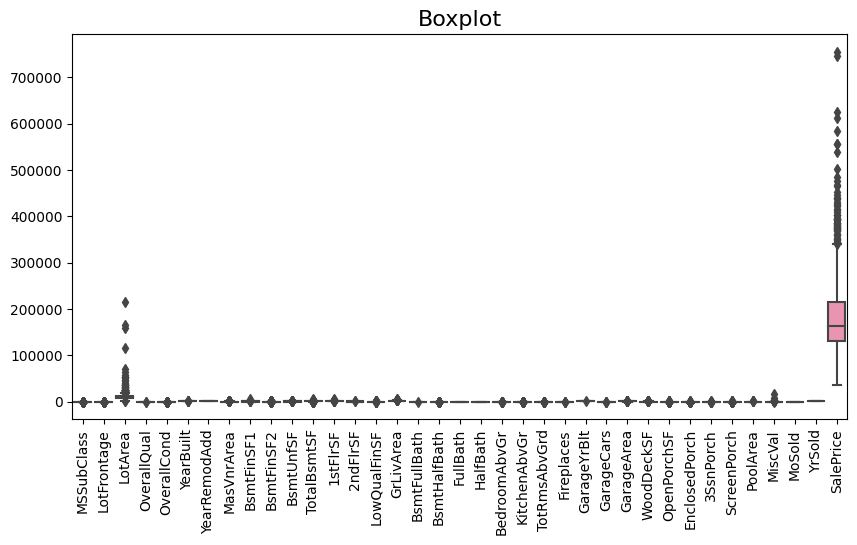

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_numbers.drop(columns=['Id'])) 
plt.title("Boxplot", fontsize=16) 
plt.xticks(rotation=90, fontsize=10) 
plt.show()

**OverallQual, GrLivArea, and TotalBsmtSF are likely to show red or dark colors, indicating a positive correlation with SalePrice, meaning higher values in these features tend to result in a higher sales price**

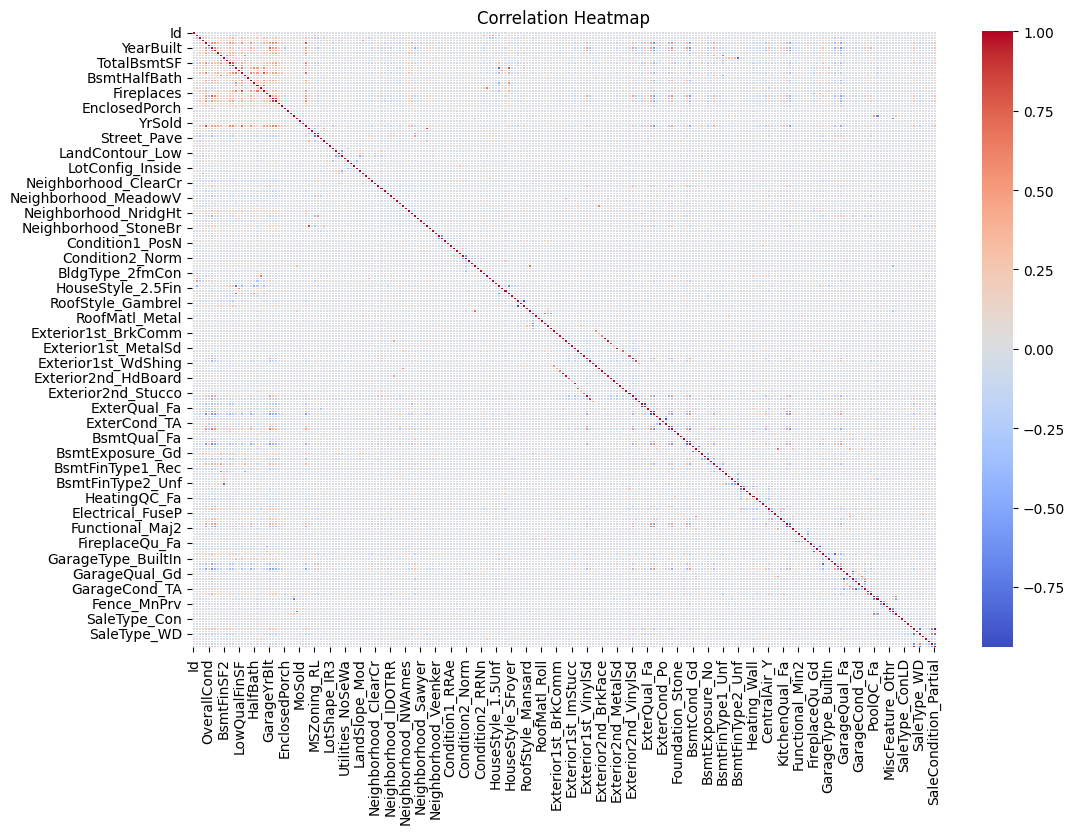

In [19]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Majority Voting model which uses more than 2 models for predicting here i have taken 3 models, A Voting Regressor combines predictions from multiple regression models to make a final prediction.**

In [20]:
X = train_data.drop(columns=['SalePrice', 'Id'])
y = train_data['SalePrice']
X = pd.get_dummies(X)
test_data = pd.get_dummies(test_data)
X, test_data = X.align(test_data, join='left', axis=1)
X = X.fillna(0)
test_data = test_data.fillna(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_df_scaled = scaler.transform(test_data)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
voting_clf = VotingRegressor(estimators=[('xgb', xgb), ('rf', rf), ('ada', ada)])
voting_clf.fit(X_train, y_train)
y_val_pred = voting_clf.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error on Validation Set: {mae}")
test_pred = voting_clf.predict(test_df_scaled)
submission_df = pd.DataFrame({
    'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'],
    'SalePrice': test_pred
})
submission_df.to_csv('house_price_predictions.csv', index=False)

print("Predictions saved to house_price_predictions.csv")

Mean Absolute Error on Validation Set: 18467.140882571246
Predictions saved to house_price_predictions.csv


**Voting Regressor is better because it directly predicts prices with a reasonably low error MAE = 18,467.**

In [21]:
submission_df.head(10)

,Id,SalePrice
0,1461,125873.433981
1,1462,144267.475799
2,1463,178380.448708
3,1464,183772.987201
4,1465,215012.885486
5,1466,178383.434420
6,1467,170026.234712
7,1468,173981.840778
8,1469,181650.149799
9,1470,123368.063128


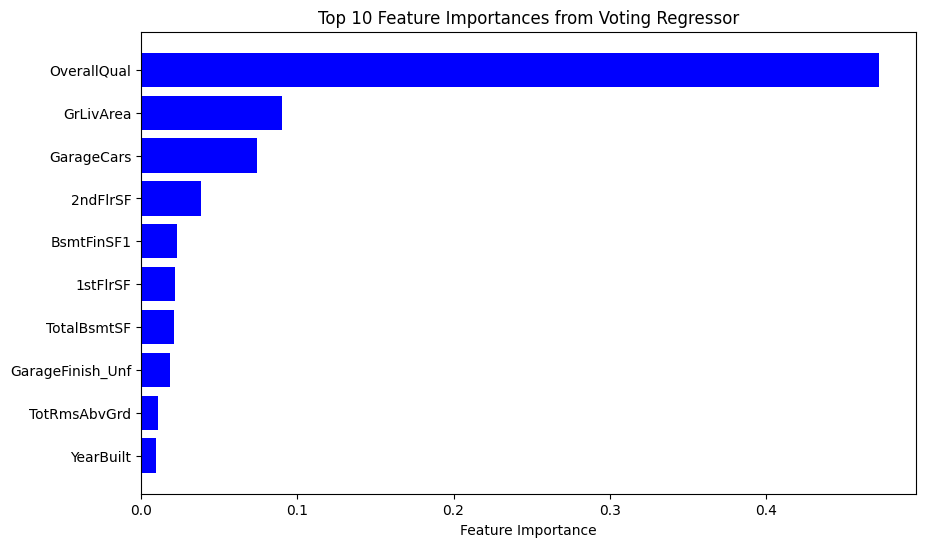

In [22]:
import numpy as np
import matplotlib.pyplot as plt
xgb_importances = voting_clf.named_estimators_['xgb'].feature_importances_
rf_importances = voting_clf.named_estimators_['rf'].feature_importances_
ada_importances = voting_clf.named_estimators_['ada'].feature_importances_
feature_importances = np.mean([xgb_importances, rf_importances, ada_importances], axis=0)
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_importances[:10], color='blue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Voting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [23]:
y_binned = pd.qcut(y, q=3, labels=[0, 1, 2])  # Ternary classification (low, medium, high)
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(X, y_binned, test_size=0.2, random_state=42)
X_train_cls = scaler.fit_transform(X_train_cls)
X_val_cls = scaler.transform(X_val_cls)
test_df_scaled_cls = scaler.transform(test_data)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_cls, y_train_cls)

y_val_cls_pred = dt_gini.predict(X_val_cls)
accuracy = accuracy_score(y_val_cls, y_val_cls_pred)
print(f"DecisionTreeClassifier (Gini) Accuracy on Validation Set: {accuracy}")

test_pred_cls = dt_gini.predict(test_df_scaled_cls)

bin_medians = y.groupby(y_binned).median()
test_pred_prices = bin_medians[test_pred_cls].values

submission_gini_df = pd.DataFrame({
    'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'],
    'SalePrice': test_pred_prices
})
submission_gini_df.to_csv('house_price_predictions_gini.csv', index=False)

print("Predictions using Gini Index saved to house_price_predictions_gini.csv")

DecisionTreeClassifier (Gini) Accuracy on Validation Set: 0.7465753424657534
Predictions using Gini Index saved to house_price_predictions_gini.csv


/tmp/ipykernel_16/2996354450.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_medians = y.groupby(y_binned).median()


**If the goal is categorizing house prices into different price ranges, Decision Tree Classifier is more appropriate, as it has a decent classification accuracy (74.66%).**

In [24]:
submission_gini_df.head()

,Id,SalePrice
0,1461,118500.0
1,1462,163250.0
2,1463,163250.0
3,1464,242000.0
4,1465,163250.0


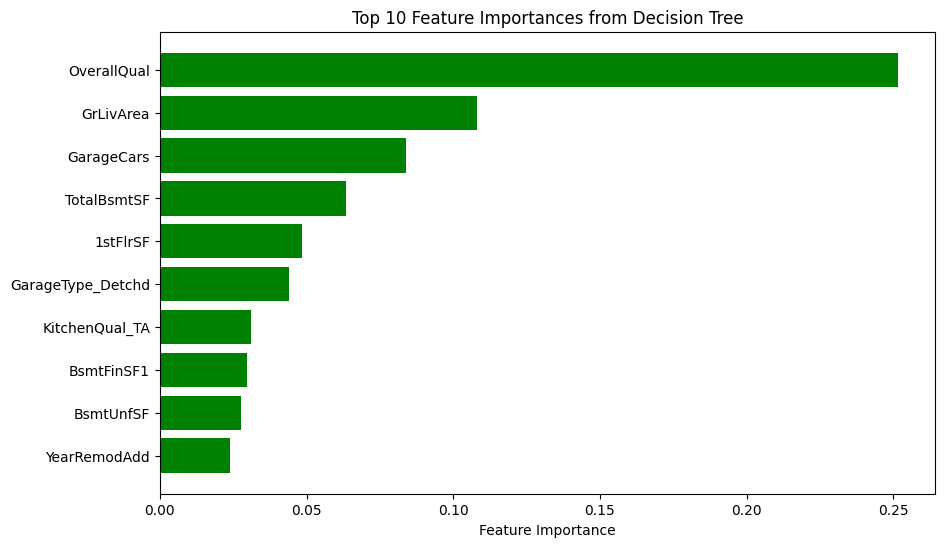

In [25]:
dt_importances = dt_gini.feature_importances_
sorted_idx_dt = np.argsort(dt_importances)[::-1]
sorted_importances_dt = dt_importances[sorted_idx_dt]
sorted_feature_names_dt = feature_names[sorted_idx_dt]
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_dt[:10], sorted_importances_dt[:10], color='green')  # Top 10 important features
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.gca().invert_yaxis()
plt.show()